In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.set_option('display.float_format', '{:.4f}'.format)

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]  
В рамках расчетов принять:
* за X заработную плату (то есть, zp - признак),
* за y - значения скорингового балла (то есть, ks - целевая переменная).  

### Используя математические операции, посчитать коэффициенты линейной регрессии.
#### 1. Произвести расчет:
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.1 с использованием intercept
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.1 без использования intercept

In [2]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
df = pd.DataFrame.from_dict(dict(zip(zp, ks)), orient='index')
df = df.reset_index()
df.columns  = ['Зарплата', 'Кредитный рейтинг']
x = 'Зарплата'
y = 'Кредитный рейтинг'
df

,Зарплата,Кредитный рейтинг
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


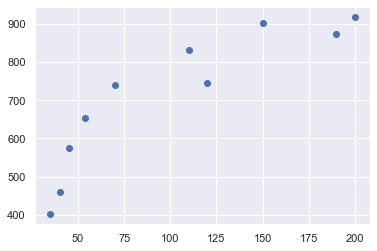

In [3]:
plt.scatter(zp, ks)
plt.show()

Вообще разброс точек больше похож на y = √a*x  
<img src="http://mathematichka.ru/school/functions/gr0.png">  
Но согласно задаче решаем через прямую $$y = a + bx$$

***

In [4]:
# 1.1. с intercept (a)

In [5]:
# нахождение коэффициента b

$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$

In [6]:
b = ((df[x]*df[y]).mean() - df[x].mean() * df[y].mean()) / \
    ((df[x]**2).mean() - df[x].mean()**2)
b

2.620538882402765

In [7]:
# нахождение коэффициента a

$$a = \overline{y} - b \cdot {\overline{x}}.$$

In [8]:
a = df[y].mean() - b * df[x].mean()
a

444.1773573243596

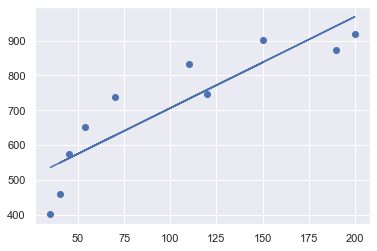

,Зарплата,Кредитный рейтинг,Кредитный рейтинг_средний
0,35,401,535.8962
1,45,574,562.1016
2,190,874,942.0797
3,200,919,968.2851
4,40,459,548.9989
5,70,739,627.6151
6,54,653,585.6865
7,150,902,837.2582
8,120,746,758.6420
9,110,832,732.4366


In [9]:
# результат
y_mean = 'Кредитный рейтинг_средний'
df[y_mean] = a + b * df[x]

plt.scatter(zp, ks)
plt.plot(df[x], a + b * df[x])
plt.show()
df

***

In [10]:
# # 1.1. без intercept (a) матричным методом

$$b = (X^T*X)^{-1}*X^T*Y;$$

In [11]:
X = np.array(df[x].tolist()).reshape(len(df[x]),1)
Y = np.array(df[y].tolist()).reshape(len(df[y]),1)
X, Y

(array([[ 35],
        [ 45],
        [190],
        [200],
        [ 40],
        [ 70],
        [ 54],
        [150],
        [120],
        [110]]),
 array([[401],
        [574],
        [874],
        [919],
        [459],
        [739],
        [653],
        [902],
        [746],
        [832]]))

In [12]:
# нахождение a и b матричным способом (для проверки предыдущих результатов)
X_a = np.hstack([np.ones((len(X), 1)), X])
np.dot(np.linalg.inv(np.dot(X_a.T, X_a)), X_a.T@Y)

array([[444.17735732],
       [  2.62053888]])

In [13]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@Y)
B = np.squeeze(B)[()]
B

5.889820420132688

In [14]:
?plt.plot()

Object `plt.plot()` not found.


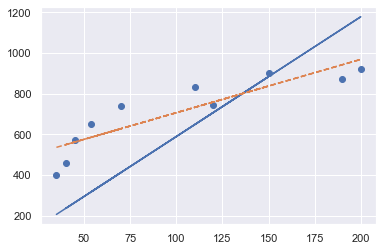

,Зарплата,Кредитный рейтинг,Кредитный рейтинг_средний,Кредитный рейтинг_средний без a
0,35,401,535.8962,206.1437
1,45,574,562.1016,265.0419
2,190,874,942.0797,1119.0659
3,200,919,968.2851,1177.9641
4,40,459,548.9989,235.5928
5,70,739,627.6151,412.2874
6,54,653,585.6865,318.0503
7,150,902,837.2582,883.4731
8,120,746,758.6420,706.7785
9,110,832,732.4366,647.8802


In [15]:
y_mean_NI = 'Кредитный рейтинг_средний без a'
df[y_mean_NI] = B * df[x]
plt.scatter(zp, ks)
plt.plot(df[x], B * df[x])
plt.plot(df[x], df[y_mean], linestyle='--') # предыдущий результат пунктиром
plt.show()
df

***

#### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [16]:
# 2. Посчитать коэффициент линейной регрессии при заработной плате
# Расчет с помощью градиентного спуска (без intercept).
# y = b*x
def mse(B1, Y=Y, X=X): # без a
    return np.sum((B1*X-Y)**2)/len(X)

def mse_derivative(B1, Y=Y, X=X): # без a
    return (2/len(X)) * np.sum((B1*X-Y)*X)

def gradient(B1=0.1, limit=100, alpha=1e-06):
    print_lim = 10**(len(str(limit))-2)
    for i in range(limit+1):
        B1 -= alpha * mse_derivative(B1)
        if i%print_lim == 0:
            print(f'iteration={i: <3}, B1={B1: < 25}, mse={mse(B1)}')
    return B1

In [17]:
X = np.array(df[x].tolist())
Y = np.array(df[y].tolist())

In [18]:
alpha = 0.0000001 # минимальный шаг в рамках перебора 0.000001
limit = 10000
B1 = 1 # какую цифру не поставить - результат тот же
B1 = gradient(B1, limit, alpha)

iteration=0  , B1= 1.01347302              , mse=384107.3780804722
iteration=1000, B1= 5.580916943784742       , mse=57831.44029220713
iteration=2000, B1= 5.8702522167480655      , mse=56522.13367677324
iteration=3000, B1= 5.8885808271432225      , mse=56516.879584715934
iteration=4000, B1= 5.88974189525489        , mse=56516.85850066808
iteration=5000, B1= 5.889815445793135       , mse=56516.8584160603
iteration=6000, B1= 5.889820105021672       , mse=56516.858415720795
iteration=7000, B1= 5.889820400171253       , mse=56516.85841571941
iteration=8000, B1= 5.889820418868183       , mse=56516.8584157194
iteration=9000, B1= 5.88982042005259        , mse=56516.85841571941
iteration=10000, B1= 5.889820420127616       , mse=56516.85841571941


In [19]:
print(f'Значение из предыдущей задачи: {round(B, 4)} равно значению, \
полученному в рамках градиентного спуска: {round(B1, 4)}')

Значение из предыдущей задачи: 5.8898 равно значению, полученному в рамках градиентного спуска: 5.8898


In [20]:
df_corr = df[[x,y]].corr()
df_corr

,Зарплата,Кредитный рейтинг
Зарплата,1.0000,0.8875
Кредитный рейтинг,0.8875,1.0000


In [21]:
corr = df_corr.loc['Зарплата',y]
R2 = corr**2
print(f'Коэффициент корреляции corr = {corr} -- сила линейной зависимости зарплаты и кредитного рейтинга.\nКоэффициент детерминации R2 = {R2} -- столько процентов изменчивости описывает выбранная матмодель.')

Коэффициент корреляции corr = 0.8874900920739162 -- сила линейной зависимости зарплаты и кредитного рейтинга.
Коэффициент детерминации R2 = 0.7876386635293682 -- столько процентов изменчивости описывает выбранная матмодель.


***

#### 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента? 

Таблица Лапласа используется когда известно среднее квадратичное отклонение геенеральной совокупности. В случае, если среднее квадратичное отклонение неизвестно -- используется таблица критических точек распределения Стьюдента. Для применения t-критерия Стьюдента необходимо, чтобы исходные данные имели нормальное распределение и дисперсия неизвестна.

***

#### 4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [22]:
def mse_a(B0, B1, Y=Y, X=X): # с a
    return np.sum((B0 + B1*X - Y)**2)/len(X)

def mse_derivative_a(B0, B1, Y=Y, X=X, type_a_b='b'): # c a
    if type_a_b == 'a':  # производная для B0
        return (2/len(X)) * np.sum((B0 + B1*X - Y))
    else:               # производная для B1
        return (2/len(X)) * np.sum((B0 + B1*X - Y) * X)

def gradient_a(B0= 0.1, B1=0.1, limit=100, alpha=1e-06): # c a
    print_lim = 10**(len(str(limit))-2)
    for i in range(limit+1):
        B0_current = B0
        B0 -= alpha * mse_derivative_a(B0_current, B1, type_a_b='a')
        B1 -= alpha * mse_derivative_a(B0_current, B1)
        if i%print_lim == 0:
            print(f'iteration={i: <6}||| B0={B0: <25}||| B1={B1: <25}||| mse={mse_a(B0,B1)}')
    return B0, B1

In [23]:
alpha = 0.00001 # минимальный шаг в рамках перебора 0.000001
limit = 3000000
B1 = 0.1
B0 = 0.1
B0, B1 = gradient_a(B0, B1, limit, alpha)

iteration=0    ||| B0= 0.1139932               ||| B1= 1.6950780000000003      ||| mse=298805.38996099564
iteration=100000||| B0= 176.8178756872003       ||| B1= 4.588422873669245       ||| mse=24602.65909964911
iteration=200000||| B0= 283.1956881772298       ||| B1= 3.805435141410038       ||| mse=13044.16516084747
iteration=300000||| B0= 347.24756959921285      ||| B1= 3.333984975180734       ||| mse=8853.693377127487
iteration=400000||| B0= 385.81429152799836      ||| B1= 3.0501168504576253      ||| mse=7334.45965488598
iteration=500000||| B0= 409.0359675710964       ||| B1= 2.8791950478876815      ||| mse=6783.669380682817
iteration=600000||| B0= 423.0181317603773       ||| B1= 2.77628013758468        ||| mse=6583.983235150707
iteration=700000||| B0= 431.43702947702633      ||| B1= 2.7143133281816474      ||| mse=6511.588063004361
iteration=800000||| B0= 436.50619028818244      ||| B1= 2.677002063406801       ||| mse=6485.341570358934
iteration=900000||| B0= 439.55841781180436     

In [29]:
print(f'Значения из 1.1 задачи:\na = {round(a, 4)}, b = {round(b,4)}\nсоответствует значению,\
полученному в рамках градиентного спуска:\na = {round(B0, 4)}, b = {round(B1, 4)}')

Значения из 1.1 задачи:
a = 444.1774, b = 2.6205
соответствует значению,полученному в рамках градиентного спуска:
a = 444.1772, b = 2.6205
